In [7]:
import keras
import sys
sys.path.append('../')
from datasets import CD_Dataset
from models import Unet
from utility import show_batches, from_categorical
import numpy as np
from datasets import combine_y_w
import keras
import time

seed = int((time.time()*1e6)%1e6)
np.random.seed(seed)
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=seed)

dataset_path = '../CD_Dataset'
trained_models_path = '../trained_models'

input_patch_size = [350,350]
input_channels = [3]
output_channels = [3]

dataset = CD_Dataset( path=dataset_path, train_y_path="train_yc",  eval_y_path="eval_yc",  fit=True, download=True, num_classes=output_channels[0] )

means = dataset.mean_features()
stds = dataset.std_features()

('mean_features: ', array([ 0.86503507,  0.83272585,  0.72929356]))
('std_features: ', array([ 0.01255889,  0.01785996,  0.05625756]))


xs shape (10, 350, 350, 3)
ys shape (10, 350, 350, 3)
xs type float64
ys type float64


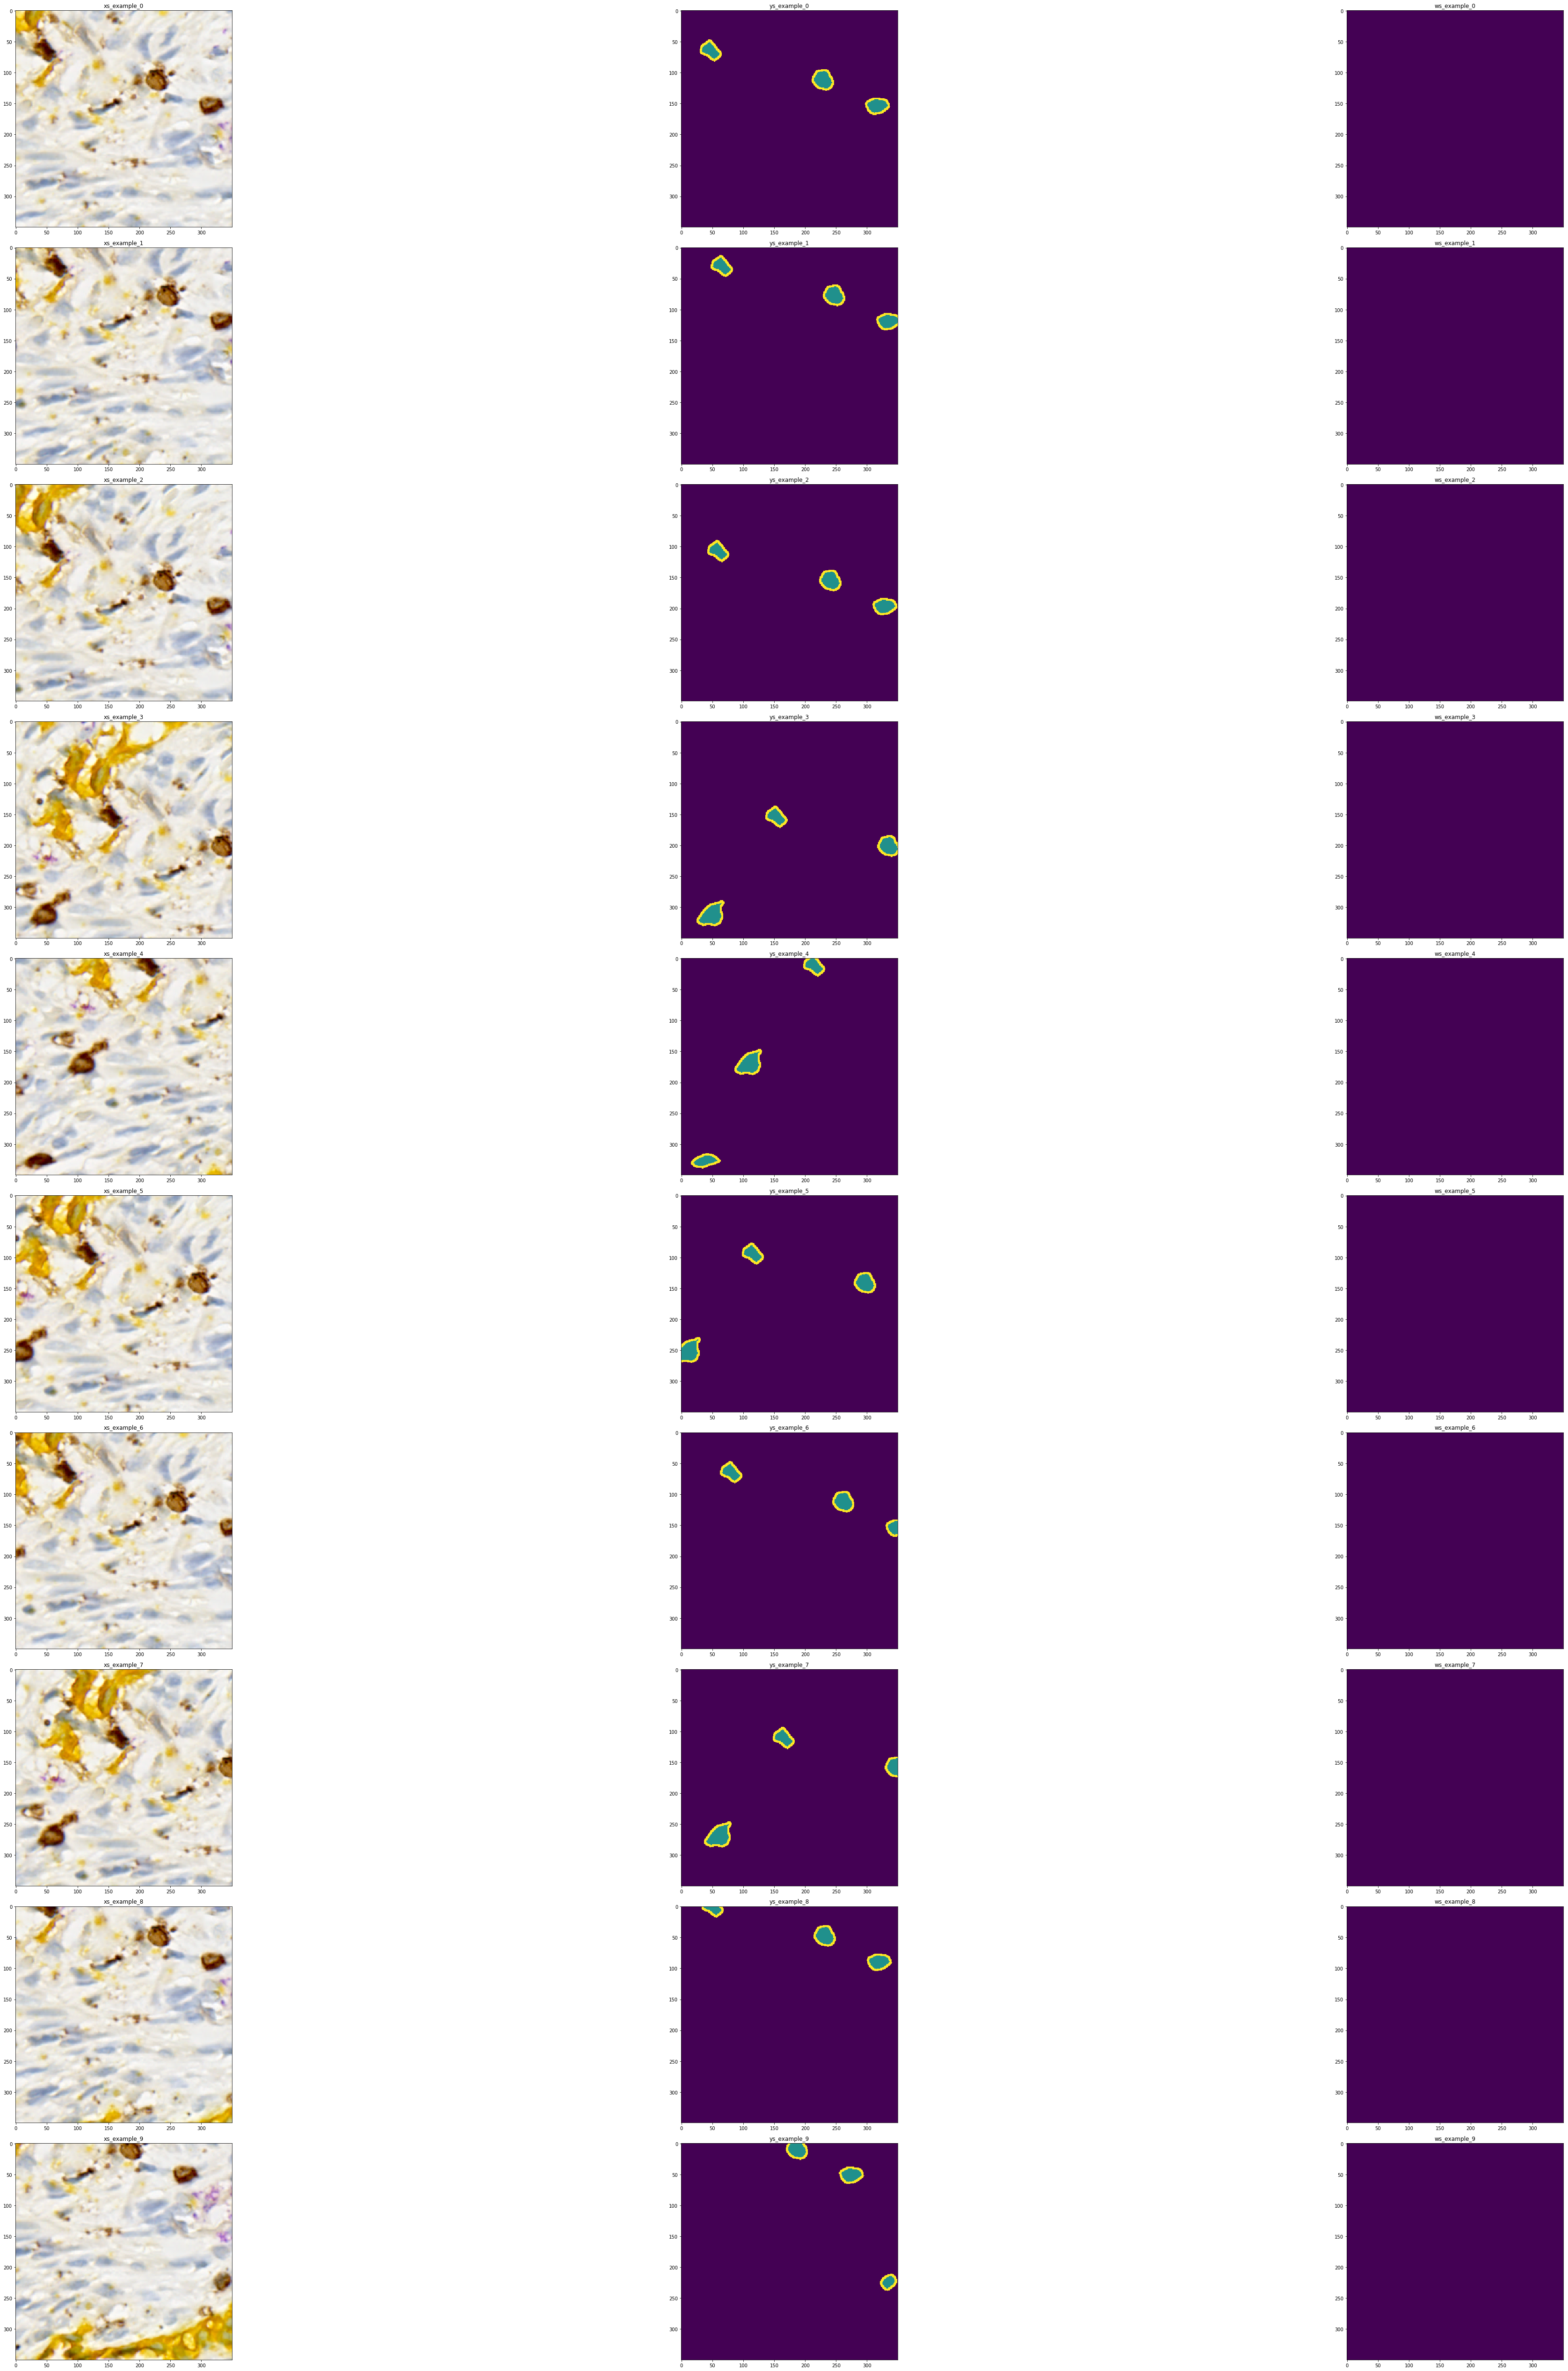

In [8]:
xs,ys,ws= dataset.sample_X_Y_W_patch_batch(input_patch_size,fit=False)
print("xs shape {}\nys shape {}\nxs type {}\nys type {}".format(xs.shape,
                                                                 ys.shape,
                                                                 xs.dtype,
                                                                 ys.dtype))

ys_imgs = from_categorical(ys)
show_batches([xs,ys_imgs,ws],["xs","ys","ws"])

# Training a model

In [10]:
# define your model
from datasets import combine_y_w

model_input_size = input_patch_size + input_channels

unet_exper = Unet(model_input_size, classes=output_channels[0], regularized=True)

def train(model,dataset,epochs=10,n_batch=10):
    problematic_batches_x = []
    problematic_batches_y = []
    problematic_batches_w = []
    eval_losses = []
    eval_metrics = []
    train_losses = []
    train_metrics = []
    h,w,_ = model.input_shape
    for i in range(epochs):
        print("=========== iteration {}/{} =============".format(i+1,epochs))

        x_train,y_train,w_train = dataset.sample_X_Y_W_patch_batch([h,w],n_batch=n_batch)
        
        w_train += 8
        y_w_train = combine_y_w(y_train,w_train)
        
        train_history = model.fit(x_train,y_train)
        train_loss,train_metric=train_history.history.values()
        
        x_eval1,y_eval1,w_eval1 = dataset.sample_X_Y_W_patch_batch([h,w],n_batch=n_batch,train=False)
        x_eval2,y_eval2,w_eval2 = dataset.sample_X_Y_W_patch_batch([h,w],n_batch=n_batch,train=False)
        
        x_eval = np.concatenate( (x_eval1,x_eval2), axis=0 )
        y_eval = np.concatenate( (y_eval1,y_eval2), axis=0 )
        w_eval = np.concatenate( (w_eval1,w_eval2), axis=0 )
        
        eval_history = model.evaulate(x_eval,y_eval)
        eval_loss, eval_metric = eval_history

        eval_losses += [eval_loss]
        train_losses += [train_loss]
        eval_metrics += [eval_metric]
        train_metrics += [train_metric]
        
    return eval_losses, train_losses, eval_metrics, train_metrics
#losses_noob_mod, metrics_noob = train(unet_noob,dataset,epochs=20)
histo = train(unet_exper,dataset,epochs=200)

        

=========== iteration 1/200 =============
Epoch 1/1
20/20 [==============================] - 2s 83ms/step
=========== iteration 2/200 =============
Epoch 1/1
20/20 [==============================] - 1s 75ms/step
=========== iteration 3/200 =============
Epoch 1/1
20/20 [==============================] - 1s 75ms/step
=========== iteration 4/200 =============
Epoch 1/1
20/20 [==============================] - 2s 75ms/step
=========== iteration 5/200 =============
Epoch 1/1
20/20 [==============================] - 2s 75ms/step
=========== iteration 6/200 =============
Epoch 1/1
20/20 [==============================] - 2s 75ms/step
=========== iteration 7/200 =============
Epoch 1/1
20/20 [==============================] - 1s 75ms/step
=========== iteration 8/200 =============
Epoch 1/1
20/20 [==============================] - 2s 75ms/step
=========== iteration 9/200 =============
Epoch 1/1
20/20 [==============================] - 2s 75ms/step
=========== iteration 10/200 =============
Epo

20/20 [==============================] - 2s 76ms/step
=========== iteration 84/200 =============
Epoch 1/1
20/20 [==============================] - 2s 76ms/step
=========== iteration 85/200 =============
Epoch 1/1
20/20 [==============================] - 2s 77ms/step
=========== iteration 86/200 =============
Epoch 1/1
20/20 [==============================] - 2s 77ms/step
=========== iteration 87/200 =============
Epoch 1/1
20/20 [==============================] - 2s 76ms/step
=========== iteration 88/200 =============
Epoch 1/1
20/20 [==============================] - 2s 76ms/step
=========== iteration 89/200 =============
Epoch 1/1
20/20 [==============================] - 2s 76ms/step
=========== iteration 90/200 =============
Epoch 1/1
20/20 [==============================] - 2s 76ms/step
=========== iteration 91/200 =============
Epoch 1/1
20/20 [==============================] - 2s 76ms/step
=========== iteration 92/200 =============
Epoch 1/1
20/20 [==============================

Epoch 1/1
20/20 [==============================] - 2s 76ms/step
=========== iteration 126/200 =============
Epoch 1/1
20/20 [==============================] - 2s 77ms/step
=========== iteration 127/200 =============
Epoch 1/1
20/20 [==============================] - 2s 77ms/step
=========== iteration 128/200 =============
Epoch 1/1
20/20 [==============================] - 2s 76ms/step
=========== iteration 129/200 =============
Epoch 1/1
20/20 [==============================] - 2s 76ms/step
=========== iteration 130/200 =============
Epoch 1/1
20/20 [==============================] - 2s 77ms/step
=========== iteration 131/200 =============
Epoch 1/1
20/20 [==============================] - 2s 76ms/step
=========== iteration 132/200 =============
Epoch 1/1
20/20 [==============================] - 2s 77ms/step
=========== iteration 133/200 =============
Epoch 1/1
20/20 [==============================] - 2s 77ms/step
=========== iteration 134/200 =============
Epoch 1/1
20/20 [===========

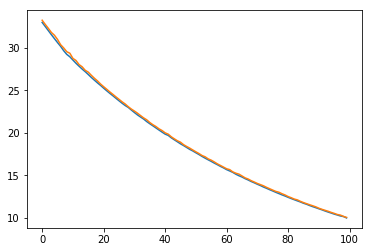

In [3]:
# save models

#unet_noob.save_model('./noob_w')
#unet_exper.save_model('./expert_w')

import matplotlib.pyplot as plt

def plot_metrics(metrics, metrics_titles=None):
    n_plot = len(metrics)
    fig = plt.figure(1)
    for i in range(n_plot):
        plt.subplot(n_plot,1,i)
        plt.plot(metrics[i])
    plt.show()
    
    
tl = histo[0]
#plot_metrics(tl)
plt.plot(tl)
tl = histo[1]
plt.plot(tl)

In [12]:
!ls


Training.ipynb	expert.h5  expert.json	noob.h5  noob.json


In [5]:
# load models

model_input_size = input_patch_size + input_channels

unet_noob = Unet(model_input_size, classes=output_channels[0])
unet_exper = Unet(model_input_size, classes=output_channels[0])

unet_exper.load_model('./noob')
unet_exper.load_model('./expert')

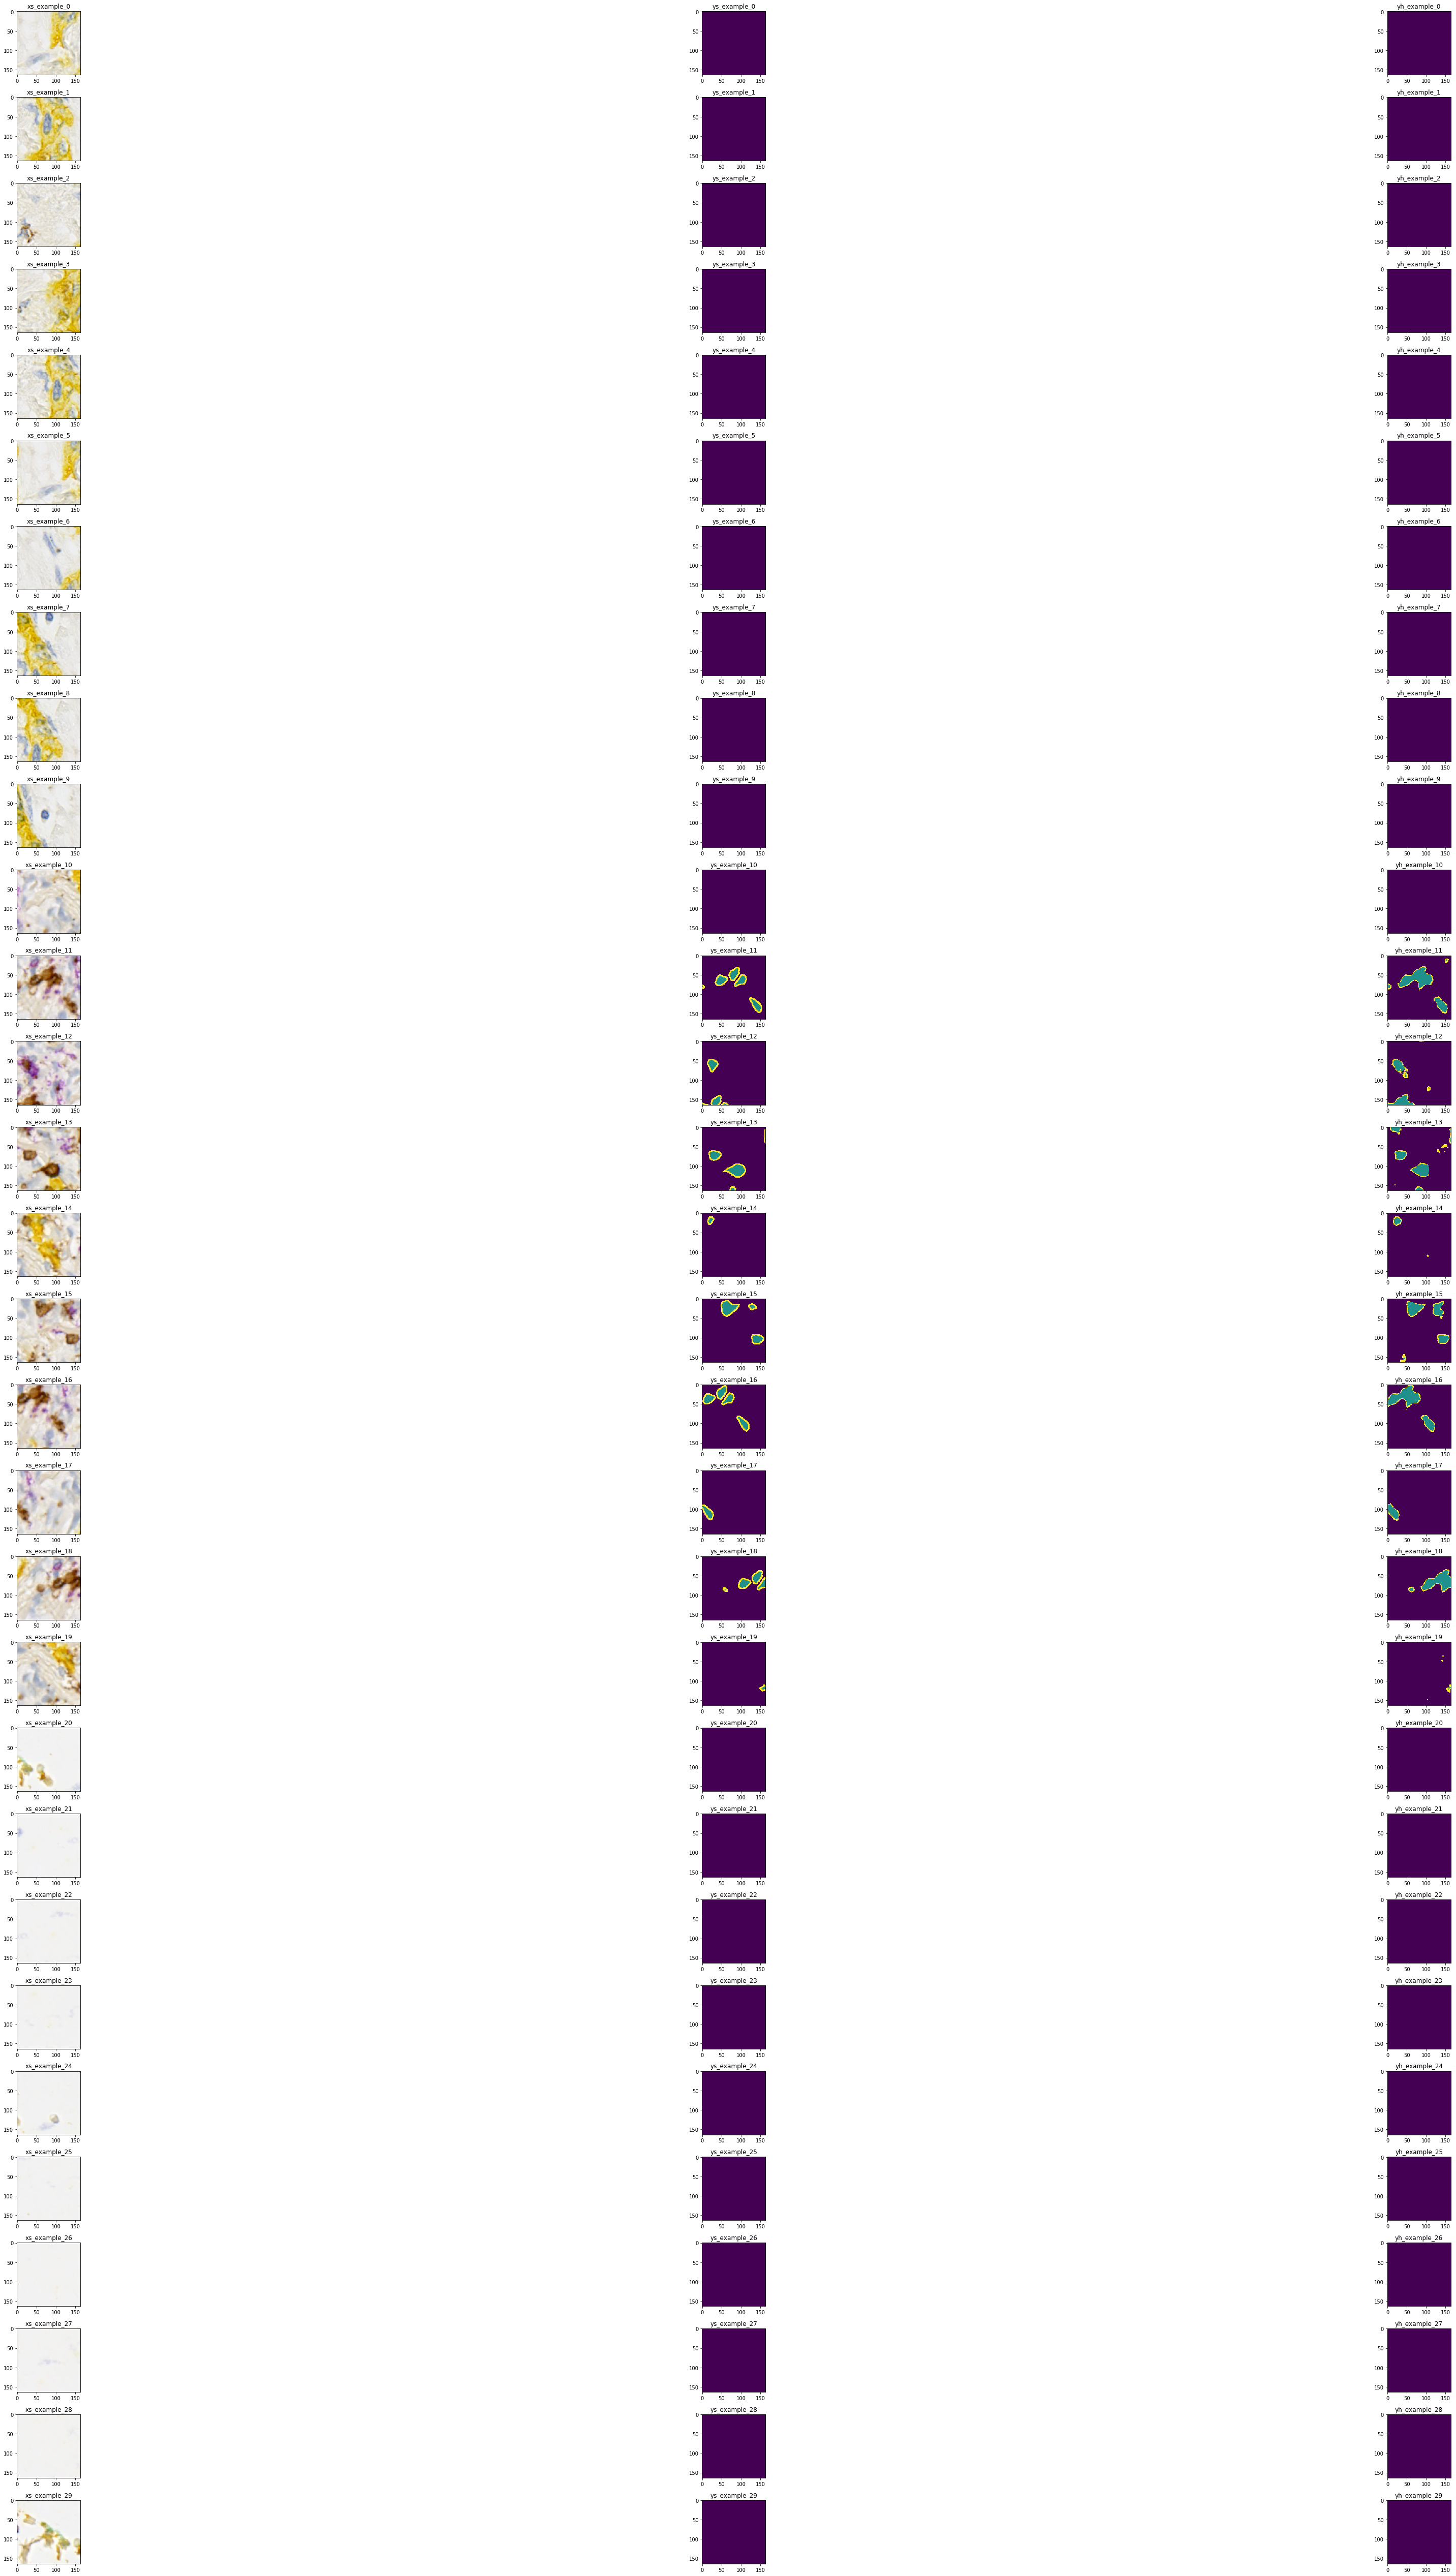

In [16]:
def crop_receptive(batch, crop_size):
    """
        Get a cropped batch to fit the perceptive field,
        the resulting output shape is n,hy,wy,cy.

        args:
            - batch (numpy array) y.shape : n,hx,wx,cy
            - crop_size (list) : hy,wy
    """
    n,hx,wx,_ = batch.shape
    hy,wy = crop_size
    dhq, dhr = (hx-hy)//2, (hx-hy)%2
    dwq, dwr = (wx-wy)//2, (wx-wy)%2
    return batch[:, dhq: hx - (dhq + dhr), dwq: wx - (dwq + dwr) ]

def evaluate(model,dataset,n_batch=10):
    h,w,_ = model.input_shape
    x_1,y_1,w_2= dataset.sample_X_Y_W_patch_batch([h,w],n_batch=n_batch, train=True)
    x_2,y_2,w_2= dataset.sample_X_Y_W_patch_batch([h,w],n_batch=n_batch, train=True)
    x_ = np.concatenate( (x_1,x_2), axis=0 )
    y_ = np.concatenate( (y_1,y_2), axis=0 )
    x_1,y_1,w_1= dataset.sample_X_Y_W_patch_batch([h,w],n_batch=n_batch, train=True)
    x_ = np.concatenate( (x_1,x_), axis=0 )
    y_ = np.concatenate( (y_1,y_), axis=0 )

    y_hat = model.predict(x_)
    x_ = crop_receptive(x_,y_hat.shape[1:3])
    y_ = crop_receptive(y_,y_hat.shape[1:3])
    return x_,y_,y_hat

x_,y_,y_hat = evaluate(unet_exper,dataset)
y_imgs = from_categorical(y_)
y_hat_imgs = from_categorical(y_hat)
show_batches([(x_*stds)+means,y_imgs,y_hat_imgs],["xs","ys","yh"])
    

In [39]:
# Expand small prediction to a whole image.
# _________________
# |       ____|
# |      | p  |
# |      |    |
# |---------(i,j)
# |
# as long as indexes are valid we can sample a patch p
# The patch_gap is the difference between input and outpu patch.
#     ___________
#    |  _______  |
#    | |       | |
#    | |       | |
#    | |_______| |
#    |___________|(i,j)
#
# If the outputs_patch_shape are smaller so they're allways valid.
#
def predict_full_image(model,x,y):
    h,w,_ = x.shape
    h_in,w_in,_ = model.input_shape
    h_out,w_out,cy = model.output_shape
    y_hat = np.zeros([h,w,cy])
    gap_h = (h_in-h_out)
    gap_w = (w_in-w_out)
    step_h = h_in - gap_h
    step_w = w_in - gap_w
    i,j = h_in,w_in
    while i<h:
        j = w_in
        while j<w:
            # Extract patch from image
            patch_x = np.expand_dims(x[i-h_in:i,j-w_in:j],0)
            patch_y = np.expand_dims(y[i-h_in:i,j-w_in:j],0)
            # Predict patch with model
            patch_y_hat = model.predict(patch_x)[0]
            model.evaulate(patch_x,patch_y)
            #plt.imshow(Y_to_image(patch_y_hat))
            #lt.show()
            # Copy to y
            y_hat[(i-h_in)+gap_h//2:i-gap_h//2,(j-w_in)+gap_w//2:j-gap_w//2] = patch_y_hat

            j+=step_w
        i+=step_h
    return y_hat

X,Y,W = dataset.get_X_Y_W()
Y_hat = predict_full_image(unet_exper,X,Y)



1/1 [==============================] - 0s 72ms/step


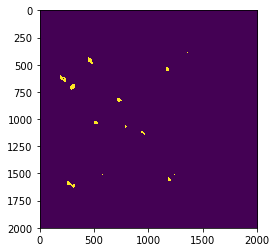

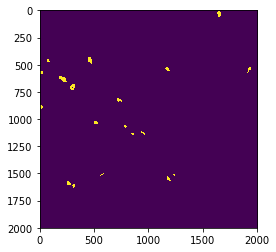

In [40]:
from matplotlib import pyplot as plt
Y_hat_img = np.argmax(Y_hat,axis=2)
Y_img = np.argmax(Y,axis=2)
plt.imshow(Y_hat_img)
plt.show()
plt.imshow(Y_img)
plt.show()